# Airbnb Calendar Analytics
**By AC on July 9, 2024**

## 0. Dependencies

#### 0.1 Import Packages

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, ast, seaborn as sb, statsmodels.api as sm, warnings

#### 0.2 Load Datasets
##### Note: ensure respective files are located in the DS folder within the working directory

In [2]:
calendar = pd.read_csv("DS//calendar.csv")
listings = pd.read_csv("DS//listings.csv")
calendar.head(1)
listings.head(1)

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_identity_verified,...,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,12651,49735,Laurel,10/29/09,within an hour,100%,98%,t,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,...,1.0,"[""Private entrance"", ""Long term stays allowed""...",3,365,t,356,151,98.0,t,1.13


## 1.  Please review the integrity of the data. Do you notice any data anomalies? If so, please describe them.

#### 1.1 Dataset Summary Statistics

#### Listings

In [3]:
# Convert IDs to object type in order to output unique values using describe
listings['id'] = listings['id'].astype('object')
listings['host_id'] = listings['host_id'].astype('object')

# Convert rates to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace("%","").astype('float64')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%","").astype('float64')

# Parse dates
listings['host_since'] = pd.to_datetime(listings['host_since'], format = '%m/%d/%y')

# Convert t/f to 1/0
listings['host_is_superhost'] = np.where(listings['host_is_superhost'] == 't',1,0)
listings['host_identity_verified'] = np.where(listings['host_identity_verified'] == 't',1,0)
listings['has_availability'] = np.where(listings['has_availability'] == 't',1,0)
listings['instant_bookable'] = np.where(listings['instant_bookable'] == 't',1,0)

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      2693 non-null   object        
 1   host_id                 2693 non-null   object        
 2   host_name               2693 non-null   object        
 3   host_since              2693 non-null   datetime64[ns]
 4   host_response_time      2132 non-null   object        
 5   host_response_rate      2132 non-null   float64       
 6   host_acceptance_rate    2387 non-null   float64       
 7   host_is_superhost       2693 non-null   int32         
 8   host_verifications      2693 non-null   object        
 9   host_identity_verified  2693 non-null   int32         
 10  neighbourhood           2693 non-null   object        
 11  room_type               2693 non-null   object        
 12  accommodates            2693 non-null   int64   

In [5]:
listings.describe(include = ['int64','float64','datetime64[ns]','int32'])

,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
count,2693,2132.000000,2387.000000,2693.000000,2693.000000,2693.000000,2529.000000,2659.000000,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000,2279.000000,2693.000000,2293.000000
mean,2015-11-21 16:32:26.379502336,95.402908,89.405111,0.447456,0.807278,3.869662,1.708976,2.219631,8.086521,631.439658,0.988489,181.115113,52.891199,95.740237,0.394356,1.874348
min,2008-03-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.010000
25%,2014-04-06 00:00:00,100.000000,90.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,31.000000,1.000000,70.000000,2.000000,94.000000,0.000000,0.390000
50%,2015-11-02 00:00:00,100.000000,98.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1124.000000,1.000000,172.000000,20.000000,97.000000,0.000000,1.180000
75%,2017-08-24 00:00:00,100.000000,100.000000,1.000000,1.000000,5.000000,2.000000,3.000000,5.000000,1125.000000,1.000000,341.000000,68.000000,100.000000,1.000000,2.710000
max,2021-01-01 00:00:00,100.000000,100.000000,1.000000,1.000000,16.000000,8.000000,27.000000,365.000000,10000.000000,1.000000,365.000000,711.000000,100.000000,1.000000,20.040000
std,NaN,14.625032,20.709495,0.497324,0.394510,3.156237,1.156607,2.031332,18.128635,545.467062,0.106691,135.635961,79.317518,5.848700,0.488803,1.968969


In [6]:
listings.describe(include = ['object'])

,id,host_id,host_name,host_response_time,host_verifications,neighbourhood,room_type,amenities
count,2693,2693,2693,2132,2693,2693,2693,2693
unique,2693,2693,1046,4,185,21,4,2631
top,12651,12651,Zeus,within an hour,"['email', 'phone', 'reviews', 'kba']",Daly City,Entire home/apt,"[""Refrigerator"", ""Hot water"", ""Dishes and silv..."
freq,1,1,56,1572,198,455,1571,4


#### Observations & Takeaways
* Maximum_nights has a mean of 631 skewed by max values at 10000
    * This field should be capped if included in analyses
* Max number of reviews of 711 while 75% percentile of 68 indicates a significant right skew
    * Can find the implicit time period in months by dividing by reviews_per_month to ensure aligns with the duration from the host start date
* Bedrooms have 164 NULL values, but min value of 1
    * Fill NULLs with 0
    * Will fill 34 records with NULL beds to 0
* There are the same number of unique listings as unique host_ids
    * Spot check that each host_id represents a distinct host (i.e. individual or business)
* There are 56 records in listings with a name of Zeus, and 56 records where the host was created on 11/2/15
    * Check if these records are related

In [7]:
listings['bedrooms'] = listings['bedrooms'].fillna(0)
listings['beds'] = listings['beds'].fillna(0)
listings['maximum_nights'] = np.clip(listings['maximum_nights'],a_min = 0, a_max = 365)

#### Calendar

In [8]:
# Convert IDs to object type in order to output unique values using describe
calendar['listing_id'] = calendar['listing_id'].astype('object')

# Convert date to datetime64[ns] type to output describe summary statistics
calendar['date'] = pd.to_datetime(calendar['date'])

# Convert t/f to 1/0
calendar['available'] = np.where(calendar['available'] == 't',1,0)

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982950 entries, 0 to 982949
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  982950 non-null  object        
 1   date        982950 non-null  datetime64[ns]
 2   available   982950 non-null  int32         
 3   price       982950 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 26.2+ MB


In [10]:
calendar.describe(include = ['int64','datetime64[ns]','int32'])

,date,available,price
count,982950,982950.000000,982950.000000
mean,2021-07-03 19:12:03.955440640,0.545272,202.158518
min,2020-12-29 00:00:00,0.000000,0.000000
25%,2021-04-04 00:00:00,0.000000,79.000000
50%,2021-07-04 00:00:00,1.000000,129.000000
75%,2021-10-03 00:00:00,1.000000,229.000000
max,2022-01-04 00:00:00,1.000000,10000.000000
std,NaN,0.497946,325.455831


In [11]:
calendar.describe(include = ['object'])

,listing_id
count,982950
unique,2693
top,14971411
freq,366


#### Observations & Takeaways
* The same number of unique listing_ids exist in both listings and calendar tables
* The date range in calendar is larger than 365 days

#### 1.2 Test If Results Meet Expectations

#### 1.2.1 Exactly 365 calendar records per listing_id over the same time range

Result: ❌

In [12]:
calendar.groupby('listing_id')['date'].agg(['min','max','count']).value_counts(normalize = True)

min         max         count
2021-01-04  2022-01-03  365      0.454140
2021-01-03  2022-01-02  365      0.243595
2021-01-02  2022-01-01  365      0.092833
2021-01-01  2021-12-31  365      0.075381
2020-12-30  2021-12-29  365      0.072039
2020-12-31  2021-12-30  365      0.044931
2021-01-05  2022-01-04  365      0.012254
2020-12-29  2021-12-28  365      0.002971
2021-01-04  2022-01-04  366      0.001857
Name: proportion, dtype: float64

In [13]:
# Ensure dates line up with pandas calendar for sample listing with 366 days
listing_id = pd.DataFrame(calendar.groupby('listing_id')['date'].count().where(lambda x : x==366).dropna()).join(listings.set_index('id')).index[0]
calendar[calendar['listing_id']==listing_id].merge(pd.DataFrame({"date": pd.date_range('2021-01-04', '2022-01-04')}),how='left', indicator = True).where(lambda x : x['_merge']!='both').dropna()

,listing_id,date,available,price,_merge


##### Data Anomaly
* 5 listings have 366 days in the calendar
    * While the calendar days align with that of the pandas library, an extra day has been added before or after the intended 365 day period in the future
* Listings in the calendar don't have a consistent start and end date
    * Potential hypotheses of the cause of calendar date discrepencies across listings include time zone differences, syncing issues, listing updates, hosts integrating their Airbnb calendar with other platforms (i.e. Google Calendar), API limitations, or platform updates or bugs, among others.

#### 1.2.2 listings.availability_365 perfectly aligns with calendar.availability aggregated

Result: ❌

In [14]:
(pd.Series(list(listings['availability_365']),index = listings['id']).sort_index() == calendar.groupby('listing_id')['available'].sum().sort_index()).value_counts()

True     2477
False     216
Name: count, dtype: int64

In [15]:
listings = listings.set_index('id').join(pd.DataFrame({'availability_365_calendar' : calendar.groupby('listing_id')['available'].sum().sort_index()}))

In [16]:
listings[listings['availability_365']!=listings['availability_365_calendar']][['availability_365','availability_365_calendar','has_availability']]

,availability_365,availability_365_calendar,has_availability
id,,,
139723,0,64,1
208309,0,89,1
236882,0,365,1
312514,0,324,1
421119,0,340,1
...,...,...,...
45634973,0,360,1
45961776,0,168,1
46246846,0,299,1


#### Data Anomaly
* 216 listings have availability_365 of 0 when calendar availability is greater than 0
* This isn't explained by has_availability flag which is True is such cases
    * has_availability = False may indicate the listing is unlisted

#### 1.2.3 Each host_id is a distinct person or business

Result: ❌

In [17]:
listings[listings['host_name']=='Zeus'][['host_name','host_id','host_since','neighbourhood','amenities','host_verifications','host_identity_verified','number_of_reviews','reviews_per_month','availability_365_calendar','host_is_superhost']].head(10)

,host_name,host_id,host_since,neighbourhood,amenities,host_verifications,host_identity_verified,number_of_reviews,reviews_per_month,availability_365_calendar,host_is_superhost
id,,,,,,,,,,,
14251024,Zeus,14251024,2015-11-02,East Palo Alto,"[""Refrigerator"", ""Hot water"", ""Dishes and silv...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,6,0.14,233,0
15083984,Zeus,15083984,2015-11-02,Unincorporated Areas,"[""Iron"", ""Dishes and silverware"", ""Shampoo"", ""...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,16,0.35,137,0
15468004,Zeus,15468004,2015-11-02,San Carlos,"[""Extra pillows and blankets"", ""Washer"", ""Firs...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,4,0.12,227,0
16191206,Zeus,16191206,2015-11-02,Menlo Park,"[""Refrigerator"", ""Hot water"", ""Dishes and silv...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,5,0.11,0,0
17747326,Zeus,17747326,2015-11-02,Redwood City,"[""Refrigerator"", ""Hot water"", ""Lockbox"", ""Dish...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,2,0.05,148,0
17843602,Zeus,17843602,2015-11-02,Menlo Park,"[""TV"", ""Hot water"", ""Hangers"", ""Wifi"", ""Dryer""...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,17,0.37,213,0
20385475,Zeus,20385475,2015-11-02,Menlo Park,"[""Private entrance"", ""Garden or backyard"", ""Ho...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,2,0.06,222,0
20390667,Zeus,20390667,2015-11-02,Redwood City,"[""Refrigerator"", ""Hot water"", ""Lockbox"", ""Dish...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,2,0.08,222,0
20390774,Zeus,20390774,2015-11-02,Redwood City,"[""Refrigerator"", ""Heating"", ""Pool"", ""BBQ grill...","['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,0.03,179,0


In [18]:
listings.groupby('host_name')['host_id'].agg(['nunique','unique']).sort_values('nunique',ascending=False).where(lambda x: x['nunique']>1).dropna()

,nunique,unique
host_name,,
Zeus,56.0,"[14251024, 15083984, 15468004, 16191206, 17747..."
Vic,31.0,"[1122033, 1122179, 1126135, 1140091, 1140126, ..."
Startup House,27.0,"[39469121, 39469191, 39469223, 39469357, 39469..."
Alex,27.0,"[9462798, 10467127, 10597505, 17389591, 208021..."
Kimberly,25.0,"[18278319, 18287949, 18289176, 18296748, 18297..."
...,...,...
Shanta Marie,2.0,"[24633476, 30528339]"
Zheng (Roddy),2.0,"[4833768, 16081052]"
Hank,2.0,"[44796883, 44909294]"


#### Data Anomaly
* The 56 listings with host_name of Zeus all have the same starting date of 11/2/15 but different host_ids
    * Given no other hosts had a starting date of 11/2/15, it seems unlikely that all 56 Zeus listings are independant
        * Given the identify of Zeus has been verified, Zeus may not be a bot or spammer
        * One hypothesis is that 'Zeus' is an inidividual host or managemeent company with multiple properties that has created separate accounts for administrative purposes
    * While 45% of listings have host_is_superhost of True, none of the Zeus listings have host_is_superhost
        * This may indicate that other host level fields outside of id are being correctly measured at the host level 
* There are 465 host_names that are duplicated
    * As an assumption to distinguish different hosts, a distinct host_name + host_since may be used

In [19]:
# Create new estimated host_id
listings['host_id_new'] = listings['host_name'] + listings['host_since'].map(str)

#### 1.2.4 review_scores_rating of NULL coincides with 0 number_of_reviews

Result: ❌

In [20]:
#listings[listings['reviews_per_month'].isnull()][['number_of_reviews']].value_counts()
listings[listings['review_scores_rating'].isnull()][['number_of_reviews']].value_counts()

number_of_reviews
0                    400
1                     12
2                      1
3                      1
Name: count, dtype: int64

In [21]:
listings[listings['number_of_reviews']==0][['review_scores_rating','reviews_per_month']].isnull().value_counts()

review_scores_rating  reviews_per_month
True                  True                 400
Name: count, dtype: int64

#### Data Anomaly
* While all listings with 0 reviews have a NULL review_scores_rating, 14 listings without a review_scores_rating have at least 1 review
    * This may indicate a review can be left without a score
    * It may also indicate deleted reviews are being omitted from the review_scores_rating but not the number_of_reviews
    * Will fill NA with 0 noting the discrepency among 14 listings
* Can fill NAs of reviews_per_month to 0 as it coincides with 0 number_of_reviews

In [22]:
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)

In [23]:
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(0)

#### 1.3 Exploratory Analysis

#### 1.3.1 Check if 1 - available may be a good proxy for a booking
* If reduced availability is driven by bookings, one may expect to see that listings from hosts that have accepted booking requests (host_acceptance_rate > 0) would have lower availability relative to hosts that haven't

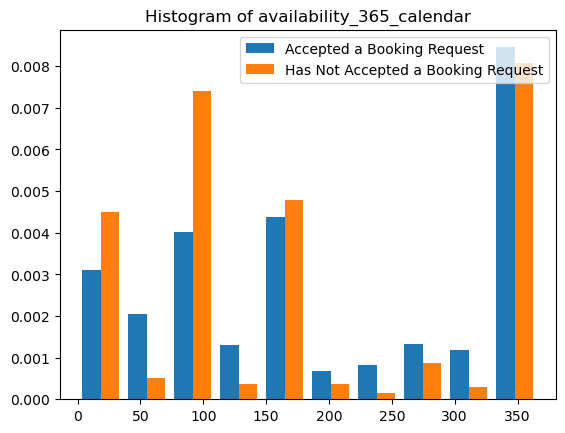

In [54]:
x = listings[listings['host_acceptance_rate'].fillna(0)>0]['availability_365_calendar']
y = listings[listings['host_acceptance_rate'].fillna(0)==0]['availability_365_calendar']

plt.hist([x, y], label=['Accepted a Booking Request', 'Has Not Accepted a Booking Request'],density=True)
plt.legend(loc='upper right')
plt.title("Histogram of availability_365_calendar")
plt.show()

#### Observations & Takeaways
* Minus some noise, the distribution of availability_365 is ~ proportionate across both sets of hosts regardless of whether they've recieved a booking requests
    * The conclusion is that 1 - calendar.availabile may not be a good proxy for a booking (given it may be more representative of 'blacked-out' days by the host than bookings)

#### 1.3.2 Host is Superhost

Airbnb's site indicates the following requirements over the last 12 months to be a superhost (https://www.airbnb.ca/help/article/829)
* Completed at least 10 trips or 3 reservations that total at least 100 nights
* Maintained a 90% response rate or higher
* Maintained a less than 1% cancellation rate, with exceptions made for those that fall under our Major Disruptive Events Policy
* Maintained a 4.8 overall rating (A review counts toward Superhost status when either both the guest and the Host have submitted a review, or the 14-day window for reviews is over, whichever comes first).

Response rate is available in the dataset, although likely not on the same 12-month time period currently used to identify super hosts. 

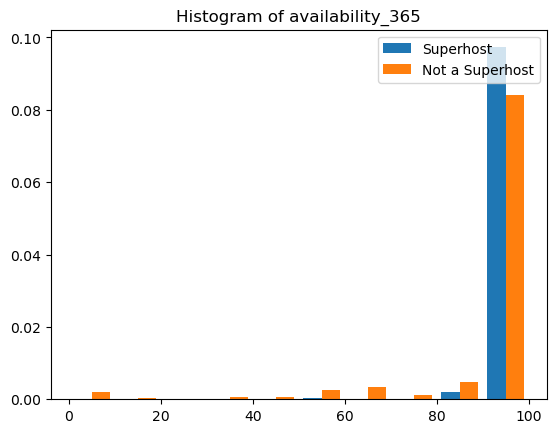

In [25]:
x = listings[listings['host_is_superhost']==1]['host_response_rate']
y = listings[listings['host_is_superhost']==0]['host_response_rate']

plt.hist([x, y], label=['Superhost', 'Not a Superhost'],density=True)
plt.legend(loc='upper right')
plt.title("Histogram of availability_365")
plt.show()

#### Observations & Takeaways
* Superhosts do have higher response rates on average than non-superhosts
    * The observed data seems reasonable based on the superhost requirements given a different time period is being considered for response rates
* Given superhost designation required hosts to have '10 trips or 3 reservations that total at least 100 nights' in ~ the last 12 months, this is a useful data point to determine which hosts have listings that have been booked recently

In [26]:
listings.columns

Index(['host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'reviews_per_month', 'availability_365_calendar',
       'host_id_new'],
      dtype='object')

#### 1.3.3 Listing Accomodates

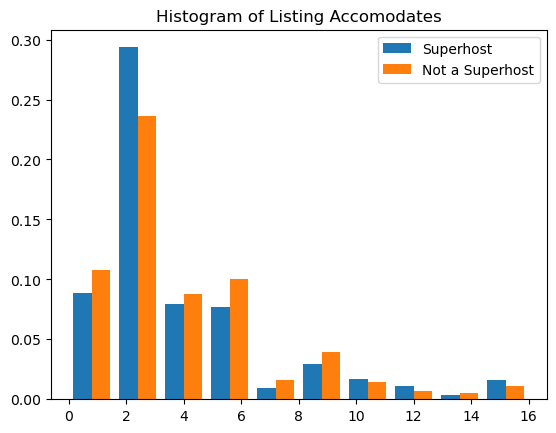

In [27]:
x = listings[listings['host_is_superhost']==1]['accommodates']
y = listings[listings['host_is_superhost']==0]['accommodates']

plt.hist([x, y], label=['Superhost', 'Not a Superhost'],density=True)
plt.legend(loc='upper right')
plt.title("Histogram of Listing Accomodates")
plt.show()

## 2.  Calculate the average listing price by calendar day. 
* Based on the results, do you notice any performance trends of listing price over time? 
* If so, please describe them and give short explanations on why you think this could happen?

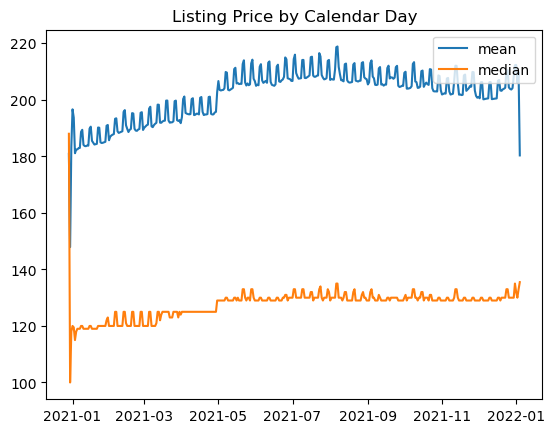

In [28]:
aggregations = ['mean','median']
plt.plot(calendar.groupby('date')['price'].agg(aggregations),label = aggregations)
plt.legend(loc="upper right")
plt.title("Listing Price by Calendar Day")
plt.show()

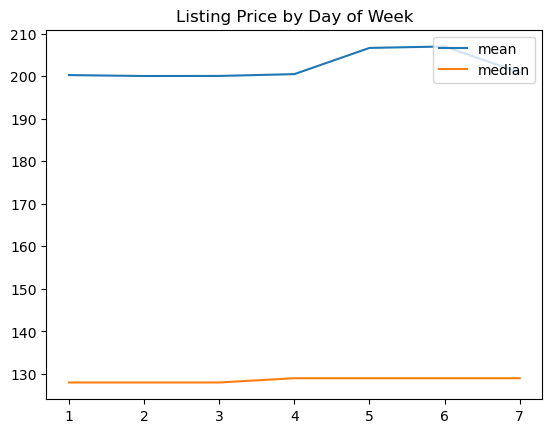

In [29]:
aggregations = ['mean','median']
dayofweek = calendar.groupby(calendar.date.dt.dayofweek + 1)['price'].agg(aggregations)
plt.plot(dayofweek,label = aggregations)
plt.legend(loc="upper right")
plt.title("Listing Price by Day of Week")
plt.show()

#### Observable patterns & associated hypotheses
1. The average listing price increases at 2021-05 then begins dropping slightly in 2021-09
    *  Likely indicative of seasonality in summer months, which could be driven by:
        * Increased demand for Airbnb rentals in the summer months when vacations and trips can be more common may drive up the price
        * Some hosts may only rent their cottages outside of summer months, reducing supply in the summer, further driving up the price
    * Given this period was during the COVID-19 pandemic, it's possible that there was an expectation by (hosts, users, or Airbnb) that regular travelling behavior may return by 2021-05
        * This could be based on anticipation of increasing vaccination rates (initial vaccine released on Dec 14 2020), improved management of the pandemic, or other social/political factors
2. Week day variation - Fridays and Saturdays have higher than average pricing
    * People may be more likely to book trips and rent an Airbnb on the weekend, resulting in higher demand and an ensuing price increase on the weekend
3. The median listing price is ~ increasing monotonically throughout the year minus weekly/daily variation
    * This could be indicative of an upward trend or cyclicality beyond the seasonality within a year (or effects directly attributable by the COVID-19 pandemic)
        * Inflation driven from monetary policy and the increasing printing of money during the COVID-19 pandemic could drive up the cost of property rentals
            * I.e. Property tax, house cleaning, hydro & gas

## 3. Suppose Airbnb charges 10% commission fee on each booked listing. 
* Please use the data to give business operation recommendations on how to increase the commission revenue.

#### 3.1 Build Dataset

#### 3.1.1 Create a copy of listings and drop columns

In [30]:
# Combine listings with avg calendar price and consider only available listings
dataset = listings[listings['has_availability']==1].join(pd.DataFrame({"avg_calendar_price":calendar.groupby('listing_id')['price'].mean()}))
dataset.head(1)
dataset.columns

Index(['host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'reviews_per_month', 'availability_365_calendar',
       'host_id_new', 'avg_calendar_price'],
      dtype='object')

In [31]:
# Drop Columns
dataset=dataset.drop(['host_id','host_name','host_verifications','availability_365','has_availability','reviews_per_month','number_of_reviews','availability_365_calendar'],axis=1)
# number_of_reviews and reviews_per_month excluded to circumvent circularity as the goal of the the model will be to predict hosts with bookings (superhosts)
dataset.head(1)
dataset.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'instant_bookable', 'host_id_new', 'avg_calendar_price'],
      dtype='object')

#### 3.1.2 Engineer Features

In [32]:
# host_years

data_extract_date = pd.to_datetime("2020-12-29") 
dataset['host_years'] = (data_extract_date - dataset['host_since']).dt.total_seconds()/3.154e+7
dataset['host_years'].head(1)

id
12651    11.173925
Name: host_years, dtype: float64

In [33]:
# host_response_time

print(dataset['host_response_time'].bfill().unique())
dataset = dataset.join(pd.get_dummies(dataset['host_response_time']).astype('int32'))

['within an hour' 'within a few hours' 'within a day' 'a few days or more'
 nan]


In [34]:
# Define get_dummies_topn

def get_dummies_topn(n,col,id = 'id', dataset = dataset.reset_index()):
    topnlevels = list(pd.Series(dataset.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending = False)/len(dataset)).index[:n])
    dataset[col] = np.where(dataset[col].isin(topnlevels),dataset[col],None)
    dummies = pd.get_dummies(dataset[col])
    dummies['id'] = dataset['id']
    return dummies.set_index('id').astype('int32')

In [35]:
# Neighbourhood

dataset.reset_index().groupby('neighbourhood')['id'].count().sort_values(ascending = False)/len(dataset)
dataset = dataset.join(get_dummies_topn(5, 'neighbourhood'))

In [36]:
# Room Type

dataset.reset_index().groupby('room_type')['id'].count().sort_values(ascending = False)/len(dataset)
dataset = pd.concat([dataset,get_dummies_topn(3, 'room_type')],axis=1)

In [37]:
# Host Acceptance Rate

dataset['host_acceptance_rate'] = dataset['host_acceptance_rate'].fillna(0)

In [38]:
# Host Response Rate

dataset['host_response_rate'] = dataset['host_response_rate'].fillna(0)
# NULL encapsulated in intercept given not included in host_response_time dummies

In [39]:
# Amenity Count

dataset['amenity_count']=[len(ast.literal_eval(amenities)) for amenities in dataset['amenities']]

In [40]:
# # Specific Amenities - Exclude

# warnings.filterwarnings(action = 'ignore')
# amenity_counts = pd.Series([amenity for amenities in dataset['amenities'] for amenity in ast.literal_eval(amenities)]).value_counts()
# amenity_counts
# dataset_w_amenity = dataset.copy()
# for i, amenity in enumerate(amenity_counts.index):
#     if 0.1 < amenity_counts[i]/len(dataset) < 0.9:
#         dataset_w_amenity[amenity] = dataset_w_amenity['amenities'].str.contains(amenity).astype('int32')
# warnings.filterwarnings(action = 'default')

In [41]:
del dataset['host_since'], dataset['host_response_time'], dataset['neighbourhood'], dataset['room_type'], dataset['amenities']

#### 3.2 Assess Multicollinearity

Text(0.5, 1.0, 'Feature Correlation Matrix')

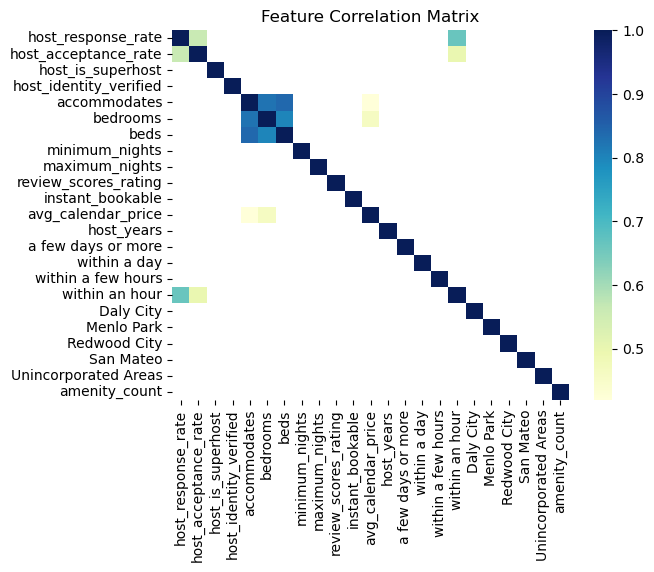

In [42]:
# Correlation Plot of Numerical Features with Correlation > 0.4

sb.heatmap(dataset.drop('host_id_new',axis=1).corr()[dataset.drop('host_id_new',axis=1).corr()>0.4], cmap="YlGnBu", annot=False)
plt.title('Feature Correlation Matrix')

In [43]:
dataset = dataset.drop(['beds','bedrooms','within an hour'],axis=1)

#### Takeaways
* Accomodates kept instead of beds and bedrooms given no handling of NULLs was required
* within an hour response time removed because of high collinearity with host response rate

#### 3.3 Model to predict superhosts

Given the absense of booking data, superhosts offer an indirect approach to identify hosts that had recent bookings
* Superhost Requirements: https://www.airbnb.ca/help/article/829
    * "Completed at least 10 trips or 3 reservations that total at least 100 nights"
* Approach limitations/assumptions
    * Superhost status is based on the last 12 months (on quarterly intervals), not future booking history
    *  Other factors like response rate, cancellation rate, and rating are used to determine super hosts
        *  Response rate is included as a model feature (albeit over a different time period) which creates a level of circularity.
            * An approach was considered to filter out hosts with a response rate <90%, however, it would negatively affect model communicatability/interpretability
        * Other hosts that perform well in bookings/trips (but not in these metrics) may be excluded
        * Superhost criteria may have been different when the provided data was extracted
    *  Assumption that a large (if not majority) share of Airbnb bookings come from superhosts

#### 3.3.1 Aggregate listings to host level using average

In [44]:
host_data = dataset.groupby(['host_id_new','host_response_rate','host_acceptance_rate','host_identity_verified']).mean().reset_index().set_index('host_id_new')
host_data = host_data.join(pd.DataFrame({'listings' : dataset.groupby(['host_id_new'])['host_id_new'].count()}))
host_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494 entries, 5r Suites2017-07-31 00:00:00 to Zubin2014-02-04 00:00:00
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_rate      1494 non-null   float64
 1   host_acceptance_rate    1494 non-null   float64
 2   host_identity_verified  1494 non-null   int32  
 3   host_is_superhost       1494 non-null   float64
 4   accommodates            1494 non-null   float64
 5   minimum_nights          1494 non-null   float64
 6   maximum_nights          1494 non-null   float64
 7   review_scores_rating    1494 non-null   float64
 8   instant_bookable        1494 non-null   float64
 9   avg_calendar_price      1494 non-null   float64
 10  host_years              1494 non-null   float64
 11  a few days or more      1494 non-null   float64
 12  within a day            1494 non-null   float64
 13  within a few hours      1494 non-null   float64
 14

In [45]:
superhost = host_data.pop('host_is_superhost')
avg_calendar_price = host_data.pop('avg_calendar_price')

#### 3.3.2 Fit Logistic Model

In [46]:
superhost_model = sm.Logit(superhost, sm.add_constant(host_data)).fit()
superhost_model.summary()

Optimization terminated successfully.
         Current function value: 0.504011
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      host_is_superhost   No. Observations:                 1494
Model:                          Logit   Df Residuals:                     1474
Method:                           MLE   Df Model:                           19
Date:                Wed, 10 Jul 2024   Pseudo R-squ.:                  0.2722
Time:                        07:49:40   Log-Likelihood:                -752.99
converged:                       True   LL-Null:                       -1034.7
Covariance Type:            nonrobust   LLR p-value:                2.717e-107
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.5137      0.476    -11.582      0.000      -6.447      -4.581
host_response_rate         0.0027      0.002      1.478      0.139      -0.001       0.006
host_acceptance_rate       0.0248      0.003      9.503      0.000       0.020       0.030
host_identity_verified     0.0364      0.152      0.239      0.811      -0.262       0.335
accommodates              -0.0915      0.024     -3.761      0.000      -0.139      -0.044
minimum_nights             0.0020      0.004      0.509      0.611      -0.006       0.010
maximum_nights            -0.0005      0.000     -1.328      0.184      -0.001       0.000
review_scores_rating       0.0252      0.004      6.969      0.000       0.018       0.032
instant_bookable          -0.1770      0.145     -1.223      0.221      -0.461       0.107
host_years                 0.0581      0.029      1.980      0.048       0.001       0.116
a few days or more        -2.4170      1.097     -2.203      0.028      -4.567      -0.267
within a day              -0.7353      0.237     -3.109      0.002      -1.199      -0.272
within a few hours        -0.1142      0.189     -0.604      0.546      -0.485       0.257
Daly City                  0.1386      0.203      0.684      0.494      -0.258       0.536
Menlo Park                -0.1287      0.247     -0.522      0.602      -0.612       0.355
Redwood City               0.4947      0.243      2.039      0.041       0.019       0.970
San Mateo                  0.0035      0.222      0.016      0.987      -0.432       0.439
Unincorporated Areas       0.3539      0.192      1.842      0.066      -0.023       0.730
amenity_count              0.0510      0.008      6.123      0.000       0.035       0.067
listings                  -0.0783      0.030     -2.604      0.009      -0.137      -0.019
==========================================================================================
"""

In [47]:
# AUC
from sklearn.metrics import roc_auc_score
print("AUC on Training Set: " + str(round(roc_auc_score(superhost, superhost_model.predict(sm.add_constant(host_data))),3)))

AUC on Training Set: 0.82


#### 3.4 Model to predict avg_calendar_price if superhost

In [48]:
superhost_data = host_data[superhost == 1]
avg_calendar_price = avg_calendar_price[superhost == 1]
log_avg_calendar_price = np.log(avg_calendar_price)

In [49]:
# AVG Daily Spend Model

superhost_avg_price_model = sm.OLS(log_avg_calendar_price,sm.add_constant(superhost_data)).fit()

print(superhost_avg_price_model.summary())

                            OLS Regression Results                            
Dep. Variable:     avg_calendar_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     67.36
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          7.55e-144
Time:                        07:49:40   Log-Likelihood:                -345.43
No. Observations:                 721   AIC:                             730.9
Df Residuals:                     701   BIC:                             822.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

Text(0.5, 1.0, 'QQ Plot')

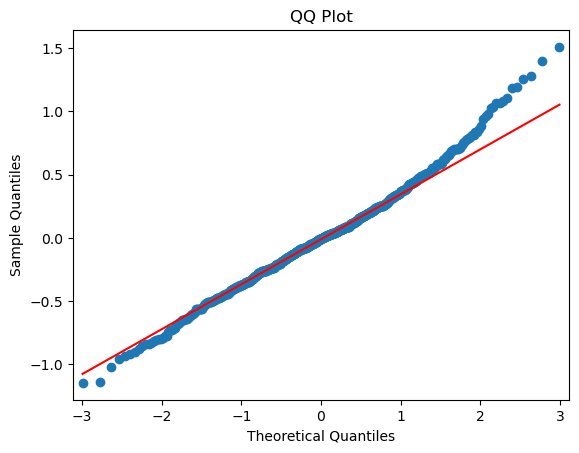

In [50]:
sm.qqplot(superhost_avg_price_model.resid, line='q')
plt.title("QQ Plot")

#### 3.5 Combine Model Coefficients

In [51]:
def relative_risk(coef, intercept = superhost_avg_price_model.params['const']):
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    return sigmoid(intercept + coef)/sigmoid(intercept)

In [52]:
superhost_relative_risk = pd.DataFrame({'superhost':superhost_model.params.apply(relative_risk)[superhost_model.pvalues<=0.05]})
superhost_avg_price_coef = pd.DataFrame({'superhost_avg_calendar_price':np.exp(superhost_avg_price_model.params[superhost_avg_price_model.pvalues<=0.05])})
pd.DataFrame(superhost_relative_risk.reset_index()).merge(superhost_avg_price_coef.reset_index(),how = 'outer').set_index('index')[1:]

,superhost,superhost_avg_calendar_price
index,,
host_acceptance_rate,1.000346,NaN
accommodates,0.998651,1.184386
review_scores_rating,1.000351,NaN
host_years,1.000796,NaN
a few days or more,0.874178,NaN
within a day,0.984923,NaN
Redwood City,1.005531,NaN
amenity_count,1.000701,1.008792
listings,0.998853,NaN


Observations/Takeaways
* 4/5 neighbourhoods included in the superhost_avg_price were statistically significant
    * This could mean there is a different supply/demand balance for rentals by neighbourhood
* For each additional person a superhost's listings accomodate (on average), inferred avg_calendar_price goes up by 18%
    * The likelihood of being a superhost goes down slightly
        * May be indicative of histogram from 1.3.3 which showed ~30% of listings from superhosts had only 2 accomodates, while the respective share was ~ 5% lower for non-superhosts
* Each additional amenity per listing is found to slightly increase the liklihood of being a superhost and the associated avg_calendar_price
    * No statistically significant relationships observed when including individual amenities in the model (hence features ommitted)
    * Opportunity to use object recognition to tag amenities in user uploaded photos to save host's time and support user discovery
* Direct criteria for superhosts (hence no takeaway otherwise)
    * Response time assumed to correlate with response rate
    * review_scores_rating
    * host_acceptance_rate could correlate with host cancellation rate